In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/'
msk_dir = f"{root_dir}/global_city/dat/vld_cty_"
prf_dir = f"{root_dir}/global_city/dat/cty_prf_"
wup_path = f"{root_dir}/global_city/dat/cty_lst_/gpw4/WUP2018_300k_2010_regionadded.txt"
class_path = f"{root_dir}/global_city/dat/non_prf_/vld_cty_/classification.txt"
gpw_path = f"{root_dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5"
riv_path = f"{root_dir}/global_city/dat/riv_out_/W5E5LR__00000000.gl5"
log_path = f"{root_dir}/global_city/dat/cty_lst_/gpw4/cluster.log"
mcy_path = f"{root_dir}/global_city/dat/cty_lst_/gpw4/mcy_pop_water.txt"

save_file = f"{root_dir}/global_city/dat/cty_lst_/gpw4/potential.txt"

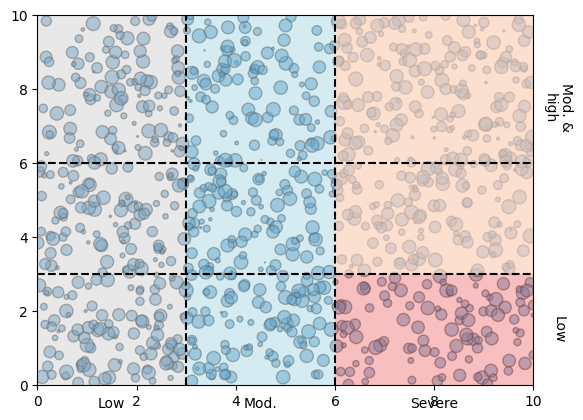

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# サンプルデータを生成
x = np.random.rand(1000) * 10
y = np.random.rand(1000) * 10
sizes = np.random.rand(1000) * 100

# 散布図を作成
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, s=sizes, alpha=0.5, edgecolors="k")

# x軸に垂直な線分で区切る
ax.axvline(x=3, color='black', linestyle='--')
ax.axvline(x=6, color='black', linestyle='--')

# y軸に垂直な線分で区切る
ax.axhline(y=3, color='black', linestyle='--')
ax.axhline(y=6, color='black', linestyle='--')

# 色付きの背景を追加
# 低、中、高、重度の領域を色分け
ax.axvspan(0, 3, facecolor='lightgrey', alpha=0.5)
ax.axvspan(3, 6, facecolor='lightblue', alpha=0.5)
ax.axvspan(6, 10, facecolor='lightcoral', alpha=0.5)

ax.axhspan(3, 10, xmin=0.6, xmax=1.0, facecolor='lightyellow', alpha=0.5)

# ラベルを追加
ax.text(1.5, -0.5, 'Low', ha='center', va='center')
ax.text(4.5, -0.5, 'Mod.', ha='center', va='center')
ax.text(8, -0.5, 'Severe', ha='center', va='center')
ax.text(10.5, 7.5, 'Mod. &\nhigh', ha='center', va='center', rotation=-90)
ax.text(10.5, 1.5, 'Low', ha='center', va='center', rotation=-90)

# 軸範囲を設定
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()


In [46]:
#mcy = [citynum, flag, rate, wup, pop, avail, mpcy, gridnum, region, country, cityname]
with open(mcy_path, 'r') as files:
    text = files.readlines()

data = []

for ind in range(1860):
    line = text[ind]
    parts = line.split('|')
    parts = [item.strip() for item in parts]
    city_num = int(parts[0])
    flag = parts[1]
    if flag == 'NoMASK':
        continue
    else:
        rate = parts[2]
        wup = float(parts[3])
        wup_unit = wup/1e3
        dwn = float(parts[4])
        dwn_unit = dwn/1e6
        ava = float(parts[5])
        ava_unit = ava/1e9
        mcy = float(parts[6])
        if ava_unit > dwn_unit:
            scarsity = '○'
        else:
            scarsity = '●'
        cel = int(float(parts[7]))
        region = parts[8]
        country = parts[9]
        city_name = parts[10]
        potential = ava_unit - dwn_unit

    data.append([city_num, city_name, scarsity, wup_unit, dwn_unit, ava_unit, mcy, potential, region, country])

#df = pd.DataFrame(data, columns=['city_num', 'city_name', 'population[Million]', 'water availability[Million m3]', 'MPCY', 'region', 'country'])
df = pd.DataFrame(data, columns=['city_num', 'city_name', 'scarcity', 'wup', 'population', 'water availability', 'MPCY', 'potential', 'region', 'country'])
df_sorted = df.sort_values(by='population', ascending=False)

def round_significant(x, sig=2):
    return round(x, sig - int(np.floor(np.log10(abs(x))))- 1)
                 
df_sorted['wup'] = df_sorted['wup'].apply(lambda x: round_significant(x))
df_sorted['population'] = df_sorted['population'].apply(lambda x: round_significant(x))
df_sorted['water availability'] = df_sorted['water availability'].apply(lambda x: round_significant(x))
df_sorted['MPCY'] = df_sorted['MPCY'].apply(lambda x: round_significant(x))
df_sorted['potential'] = df_sorted['potential'].apply(lambda x: round_significant(x))
                 
print(len(df_sorted))
df_sorted.head(35)

1553


,city_num,city_name,scarcity,wup,population,water availability,MPCY,potential,region,country
0,1,Tokyo,●,37.0,32.0,14.000,450.0,-18.00,eastern asia,Japan
1,2,Delhi,●,22.0,22.0,4.400,200.0,-18.00,southern asia,India
3,4,Ciudad de México (Mexico City),●,20.0,20.0,0.300,15.0,-20.00,central america,Mexico
8,9,Al-Qahirah (Cairo),○,17.0,17.0,710.000,42000.0,690.00,northern africa,Egypt
10,11,Dhaka,●,15.0,15.0,0.096,6.4,-15.00,southern asia,Bangladesh
2,3,Shanghai,○,20.0,15.0,16.000,1100.0,1.90,eastern asia,China
12,13,Kolkata (Calcutta),○,14.0,14.0,32.000,2200.0,17.00,southern asia,India
7,8,Mumbai (Bombay),●,18.0,14.0,9.300,650.0,-5.00,southern asia,India
9,10,Beijing,●,16.0,14.0,2.400,170.0,-11.00,eastern asia,China
11,12,Buenos Aires,●,14.0,13.0,0.700,53.0,-13.00,south america,Argentina


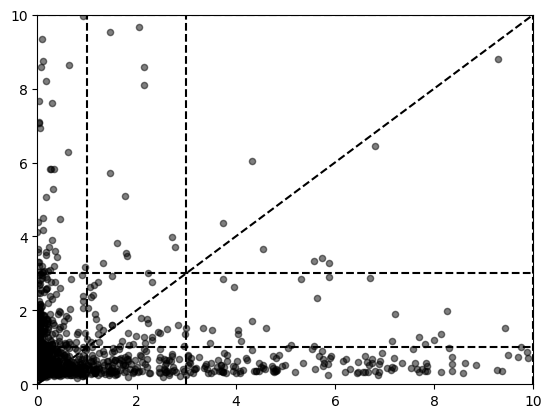

In [74]:
# 散布図を作成
fig, ax = plt.subplots()
scatter = ax.scatter(df['water availability'], df['population'], c='black', s=20, alpha=0.5, edgecolors="k")

limit = 10

# x軸に垂直な線分で区切る
ax.axvline(x=1, color='black', linestyle='--')
ax.axvline(x=3, color='black', linestyle='--')
ax.axvline(x=10, color='black', linestyle='--')

# y軸に垂直な線分で区切る
ax.axhline(y=1, color='black', linestyle='--')
ax.axhline(y=3, color='black', linestyle='--')
ax.axhline(y=10, color='black', linestyle='--')

# linear
ax.plot(np.arange(0, limit+10), np.arange(0, limit+10), color='black', linestyle='--')

# 低、中、高、重度の領域を色分け
#ax.axvspan(0, 1, facecolor='lightgrey', alpha=0.5)
#ax.axvspan(1, 3, facecolor='lightblue', alpha=0.5)
#ax.axvspan(3, 5, facecolor='lightcoral', alpha=0.5)

#ax.axhspan(3, 10, xmin=0.6, xmax=1.0, facecolor='lightyellow', alpha=0.5)

# ラベルを追加
#ax.text(1.5, -0.5, 'Low', ha='center', va='center')
#ax.text(4.5, -0.5, 'Mod.', ha='center', va='center')
#ax.text(8, -0.5, 'Severe', ha='center', va='center')
#ax.text(10.5, 7.5, 'Mod. &\nhigh', ha='center', va='center', rotation=-90)
#ax.text(10.5, 1.5, 'Low', ha='center', va='center', rotation=-90)

# 軸範囲を設定
ax.set_xlim(0, limit)
ax.set_ylim(0, limit)

plt.show()

In [76]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 24.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cartopy 0.21.0 requires shapely<2,>=1.6.4, but you have shapely 2.0.4 which is incompatible.


/tmp/ipykernel_7323/3413237507.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


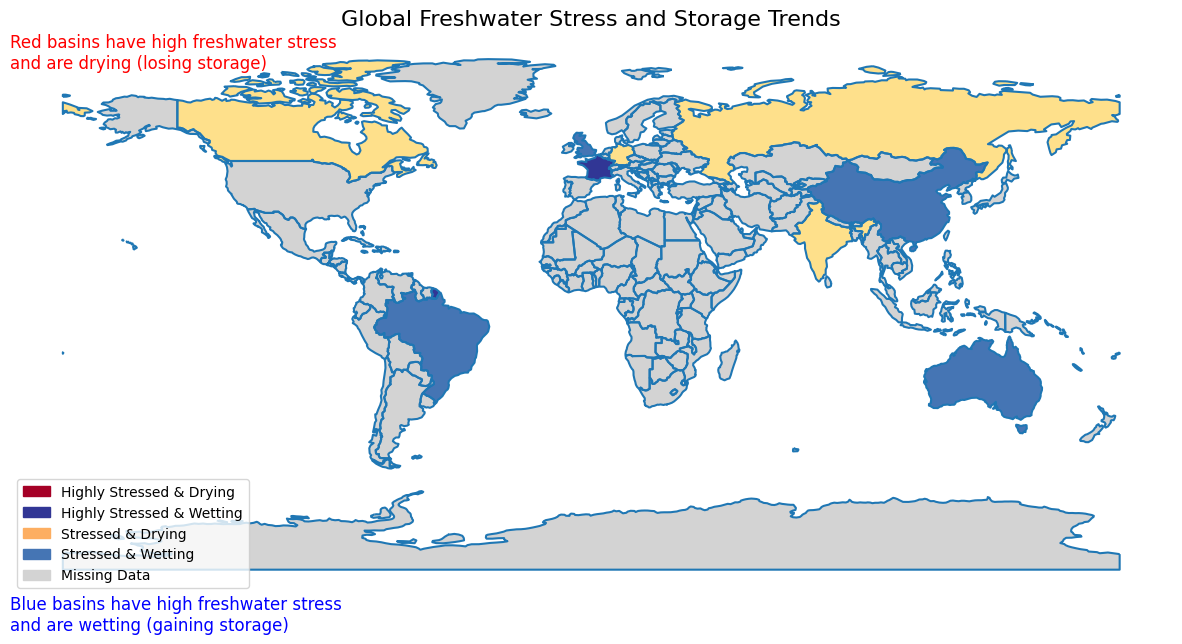

In [80]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'region': [
        'United States', 'Canada', 'Brazil', 'United Kingdom', 'France',
        'Germany', 'Russia', 'China', 'India', 'Australia'
    ],
    'freshwater_stress': [10, 40, 40, 10, 10, 40, 40, 40, 10, 10],
    'storage_trend': [2, -1, 1, 0, 3, -3, -2, 2, -3, 1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('/mnt/c/Users/tsimk/Downloads/tmp.csv', index=False)

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load the dummy data
data = pd.read_csv('/mnt/c/Users/tsimk/Downloads/tmp.csv')

# Merge the data with the shapefile
world = world.merge(data, how='left', left_on='name', right_on='region')

# Define color mapping based on freshwater stress and storage trends
def get_color(stress, trend):
    if pd.isnull(stress) or pd.isnull(trend):
        return '#D3D3D3'  # Light grey for missing data
    if stress > 40:
        if trend < -3:
            return '#a50026'  # Dark red
        elif trend < 0:
            return '#d73027'  # Red
        elif trend < 3:
            return '#fee090'  # Light yellow
        else:
            return '#313695'  # Dark blue
    else:
        if trend < -3:
            return '#fdae61'  # Orange
        elif trend < 0:
            return '#fee08b'  # Light orange
        elif trend < 3:
            return '#4575b4'  # Blue
        else:
            return '#313695'  # Dark blue

world['color'] = world.apply(lambda row: get_color(row['freshwater_stress'], row['storage_trend']), axis=1)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(ax=ax, color=world['color'])

# Add legend
import matplotlib.patches as mpatches
highly_stressed_drying = mpatches.Patch(color='#a50026', label='Highly Stressed & Drying')
highly_stressed_wetting = mpatches.Patch(color='#313695', label='Highly Stressed & Wetting')
stressed_drying = mpatches.Patch(color='#fdae61', label='Stressed & Drying')
stressed_wetting = mpatches.Patch(color='#4575b4', label='Stressed & Wetting')
missing_data = mpatches.Patch(color='#D3D3D3', label='Missing Data')
plt.legend(handles=[highly_stressed_drying, highly_stressed_wetting, stressed_drying, stressed_wetting, missing_data], loc='lower left')

# Add annotations for blue and red basins
ax.annotate('Blue basins have high freshwater stress\nand are wetting (gaining storage)', xy=(0, 0), xycoords='axes fraction', fontsize=12, ha='left', va='top', color='blue')
ax.annotate('Red basins have high freshwater stress\nand are drying (losing storage)', xy=(0, 1), xycoords='axes fraction', fontsize=12, ha='left', va='top', color='red')

# Remove axis
ax.axis('off')

plt.title('Global Freshwater Stress and Storage Trends', fontsize=16)
plt.show()
